Decision Trees and Random Forests:
    Predicting the recurrence of Kyphosis after spinal surgery in children. Exercise uses pandas, numpy, matplotlib, seaborn, scikitlearn and utilizes train_test_split, decision trees, and random forests along with classification report and confusion matrix to analyze results of prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


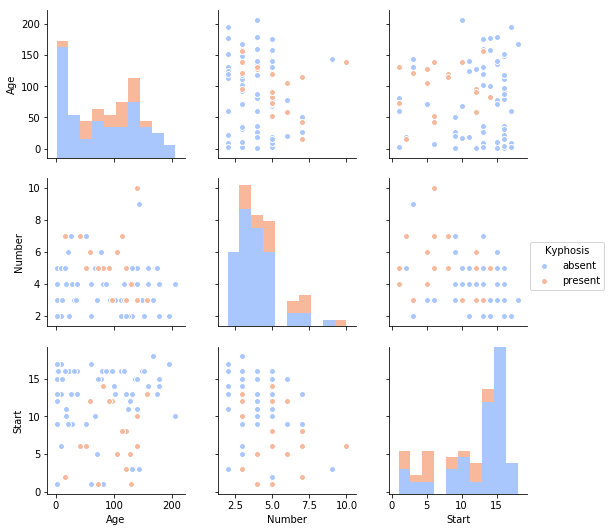

In [6]:
sns.pairplot(df, hue='Kyphosis', palette="coolwarm")

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
#Prediction and Evaluation for Decision Tree
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.89      0.80      0.84        20
    present       0.43      0.60      0.50         5

avg / total       0.80      0.76      0.77        25



[[16  4]
 [ 2  3]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
print(classification_report(y_test, rfc_pred))
print("\n")
print(confusion_matrix(y_test, rfc_pred))

             precision    recall  f1-score   support

     absent       0.86      0.95      0.90        20
    present       0.67      0.40      0.50         5

avg / total       0.82      0.84      0.82        25



[[19  1]
 [ 3  2]]
